# Yearly Scores
Here, we construct figures showing average defolition intensity in areas with significant defoliation 

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import rasterio as rio
from rasterio.transform import array_bounds
from rasterio.warp import calculate_default_transform, reproject, Resampling
import ultraplot as uplt

## Load Data

In [40]:
score_2020 = rio.open('./Data/defol_score_1000_2020.tif', 'r')
extent_2020 = rio.open('./Data/as_satellite_comp_1000_2020.tif', 'r')

score_2021 = rio.open('./Data/defol_score_1000_2021.tif', 'r')
extent_2021 = rio.open('./Data/as_satellite_comp_1000_2021.tif', 'r')

score_2022 = rio.open('./Data/defol_score_1000_2022.tif', 'r')
extent_2022 = rio.open('./Data/as_satellite_comp_1000_2022.tif', 'r')

score_2023 = rio.open('./Data/defol_score_1000_2023.tif', 'r')
extent_2023 = rio.open('./Data/as_satellite_comp_1000_2023.tif', 'r')

## Helper Functions

In [41]:
def add_raster_data(ax, image, bounds, year, crs, vmin, vmax, cmap):
    m = ax.imshow(image, cmap=cmap, levels=np.linspace(vmin, vmax, 11), transform=crs,
                  extent=[bounds[0], bounds[2], bounds[1], bounds[3]])
    ax.format(grid=False, facecolor='white', title=str(year))
    ax.set_extent([-80, -71.7, 40.3, 45], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.STATES)
    
    return m

In [42]:
def classify(image, threshold):
    image_thresh = image.copy()
    image_thresh = np.where(np.isnan(image), np.nan, image > threshold)
    return image_thresh

## Prepare Score Data

In [43]:
dest_crs = ccrs.AlbersEqualArea(central_longitude=-76.0, central_latitude=42.0,)

def prepare_for_viz(raster_file, dest_crs):
    transform, width, height = calculate_default_transform(
        raster_file.crs, dest_crs, raster_file.width, raster_file.height, *raster_file.bounds)
    
    new_image, new_transform = reproject(
        source=raster_file.read(),
        src_transform=raster_file.transform,
        src_crs=raster_file.crs,
        dst_crs=dest_crs,
        resampling=Resampling.nearest,
        dst_nodata=np.nan)

    new_image = new_image.transpose([1, 2, 0])
    new_bounds = array_bounds(new_image.shape[0], new_image.shape[1], new_transform)
    
    return new_image, new_bounds

# 2020
score_2020, bounds_2020 = prepare_for_viz(score_2020, dest_crs)
extent_2020, bounds_2020 = prepare_for_viz(extent_2020, dest_crs)

# 2021
score_2021, bounds_2021 = prepare_for_viz(score_2021, dest_crs)
extent_2021, bounds_2021 = prepare_for_viz(extent_2021, dest_crs)

# 2022
score_2022, bounds_2022 = prepare_for_viz(score_2022, dest_crs)
extent_2022, bounds_2022 = prepare_for_viz(extent_2022, dest_crs)

# 2023
score_2023, bounds_2023 = prepare_for_viz(score_2023, dest_crs)
extent_2023, bounds_2023 = prepare_for_viz(extent_2023, dest_crs)

In [44]:
cutoff = 0.1

threshold_2020 = classify(extent_2020[:, :, 0], cutoff)
score_2020 = np.where(np.isnan(score_2020[:, :, 0]), threshold_2020, score_2020[:, :, 0] * threshold_2020)
threshold_2021 = classify(extent_2021[:, :, 0], cutoff)
score_2021 = np.where(np.isnan(score_2021[:, :, 0]), threshold_2021, score_2021[:, :, 0] * threshold_2021)
threshold_2022 = classify(extent_2022[:, :, 0], cutoff)
score_2022 = np.where(np.isnan(score_2022[:, :, 0]), threshold_2022, score_2022[:, :, 0] * threshold_2022)
threshold_2023 = classify(extent_2023[:, :, 0], cutoff)
score_2023 = np.where(np.isnan(score_2023[:, :, 0]), threshold_2023, score_2023[:, :, 0] * threshold_2023)

## Plot Score Data

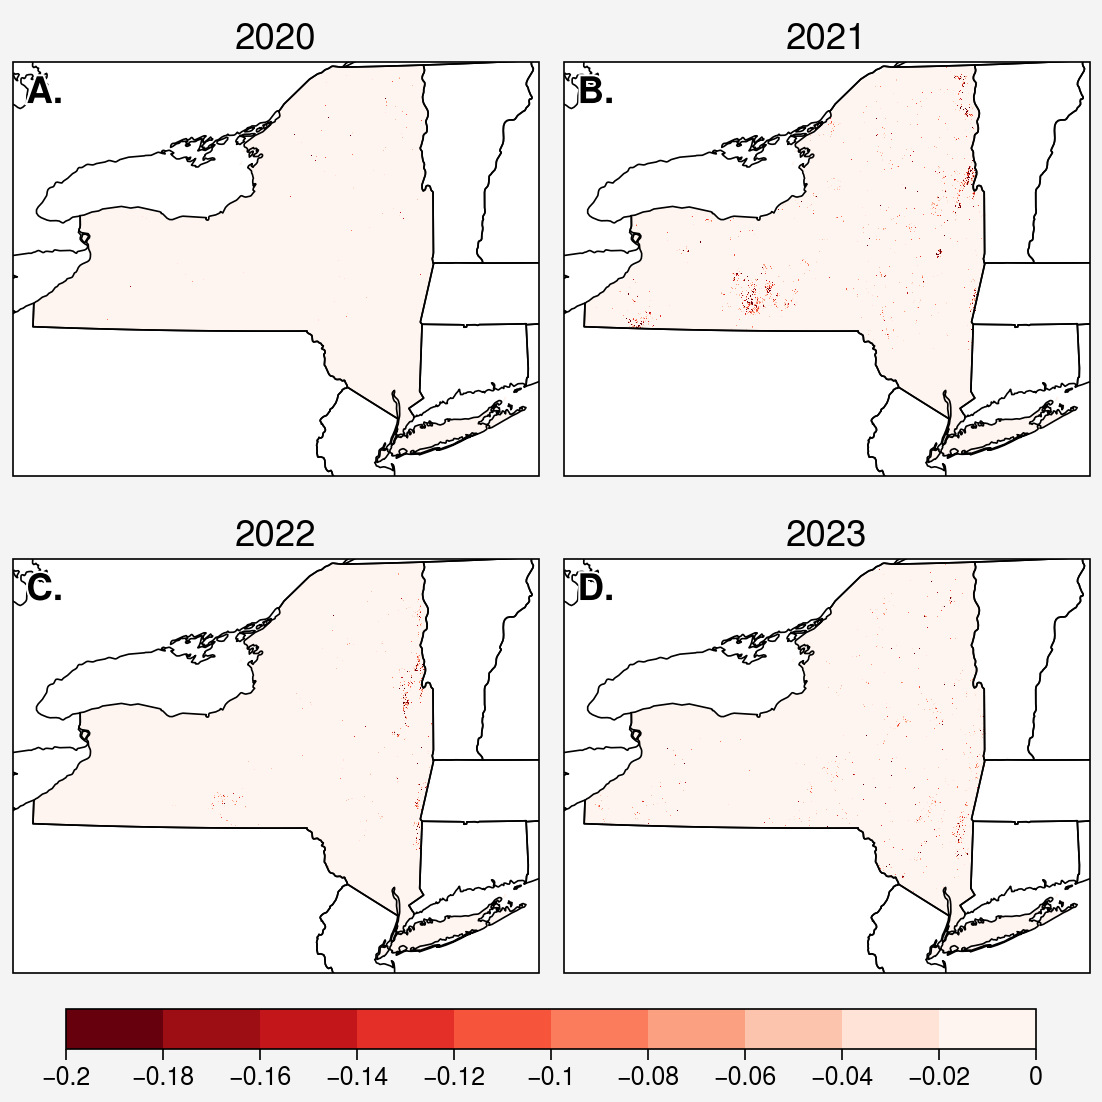

In [57]:
fig, axes = uplt.subplots(nrows=2, ncols=2, figsize=('140mm','140mm'), proj=dest_crs, 
                          facecolor='white', fontsize=12, share=False)

axes.format(abc='A.', abcloc='ul')

vmax = 0
vmin = -0.2

# Yearly raster images
add_raster_data(axes[0], score_2020, bounds_2020, 2020, dest_crs, vmin, vmax, 'Reds_r')

add_raster_data(axes[1], score_2021, bounds_2021, 2021, dest_crs, vmin, vmax, 'Reds_r')

add_raster_data(axes[2], score_2022, bounds_2022, 2022, dest_crs, vmin, vmax, 'Reds_r')

m = add_raster_data(axes[3], score_2023, bounds_2023, 2023, dest_crs, vmin, vmax, 'Reds_r')

    
fig.colorbar(m, loc='bottom', length=0.9)

fig.savefig('./Figures/YearlyScores/scores_upscaled_2020_to_2023.png')